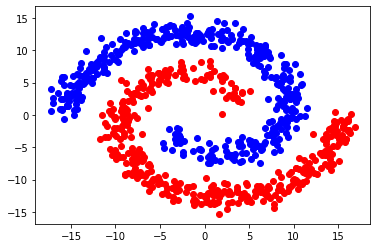

In [23]:
import numpy as np
from numpy import pi
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

np.random.seed(0)

#Dataset creation
N = 400
theta = np.sqrt(np.random.rand(N))*2*pi

r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)

r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)

#Two diferent classified data as a output 0 and 1
res_a = np.append(x_a, np.zeros((N,1)), axis=1) #Class 0 datas
res_b = np.append(x_b, np.ones((N,1)), axis=1) #Class 1 datas

#All data in one np array.
res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

X, Y = [], []

for i in range(len(res)):
    X.append([res[0],res[1]])
    Y.append([res[2]])

X = np.array(X)
Y = np.array(Y)

plt.figure()

for i in range(len(Y)):
    if Y1[i] == 0:
        plt.plot(X1[i], X2[i], "ro")
    else:
        plt.plot(X1[i], X2[i], "bo")
        
plt.show()

# Neural Network with Tanh

In [2]:
class NeuralNetworkWithTanh(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 25
        outLayerNeurons = 1
        
        self.learning_rate = 0.08
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outLayerNeurons)
        
    def tanh(self, x, der=False):
        if der == True:
            return 1-x**2
        else:
            return (np.exp(2*x) - 1) / (np.exp(2*x) + 1)
        
    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.tanh(hidden_input)
        
        output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.tanh(output_input)
        return pred
        
    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.tanh(pred, der=True)
        
        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.tanh(self.hidden_output, der=True)
        
        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)
        
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

In [ ]:
NN = NeuralNetworkWithTanh()

err = []
for i in range(10000):
    NN.train(X,Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

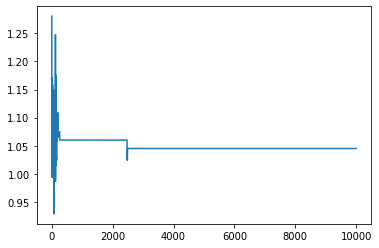

In [4]:
plt.plot(err)

In [8]:
print(NN.feedForward([0.29152,6.12533]))

[8.090427142173683]


# Neural Network with ReLU

In [16]:
class NeuralNetworkWithReLU(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 25
        outLayerNeurons = 1
        
        self.learning_rate = 0.08
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outLayerNeurons)
        
    def ReLU(self, x, der=False):
        if der == True:
            return 0
        else:
            return abs(x) * (x > 0)
        
    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.ReLU(hidden_input)
        
        output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.ReLU(output_input)
        return pred
        
    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.ReLU(pred)
        
        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.ReLU(self.hidden_output)
        
        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)
        
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

In [ ]:
NN = NeuralNetworkWithReLU()

err = []
for i in range(10000):
    NN.train(X,Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

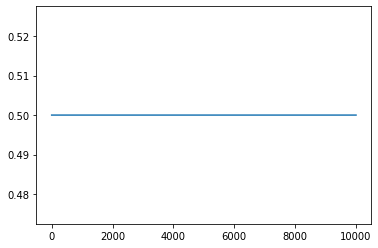

In [18]:
plt.plot(err)